# Text and Annotation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## plt.axes: Subplots by Hand

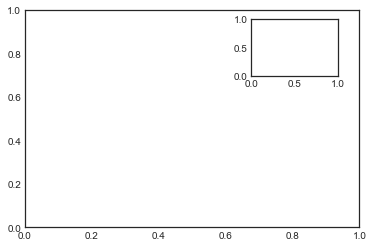

In [2]:
# numbers represent [left, bottom, width, height] in the figure coordinate system
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

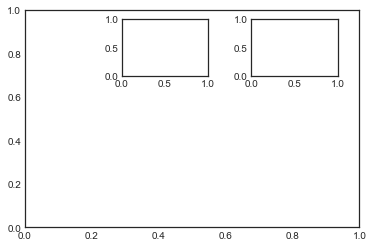

In [5]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])
ax3 = plt.axes([0.35, 0.65, 0.2, 0.2])

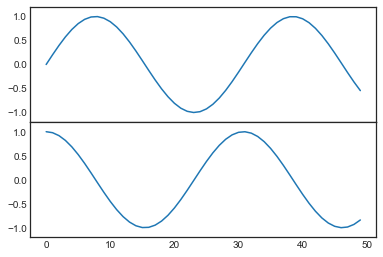

In [6]:
# command within the object-oriented interface is fig.add_axes()
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

## plt.subplot: Simple Grids of Subplots

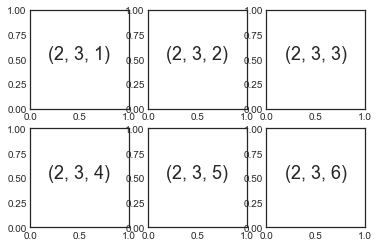

In [7]:
# lowest level of these is plt.subplot(), which creates a single subplot within a grid
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

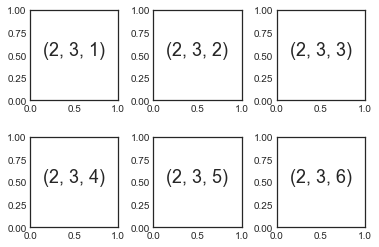

In [8]:
# command plt.subplots_adjust can be used to adjust the spacing between these plots
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    # display text!
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

## plt.subplots: The Whole Grid in One Go

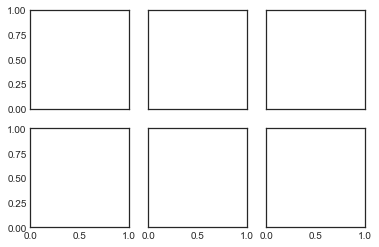

In [9]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

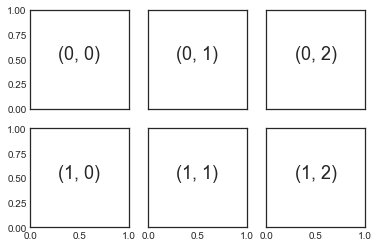

In [10]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

## plt.GridSpec: More Complicated Arrangements

In [12]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
grid

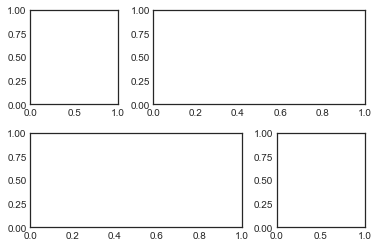

In [14]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:]) # x: 0 & y: 1 to 2
plt.subplot(grid[1, :2]) # x: 0 & y: end before 2
plt.subplot(grid[1, 2]);

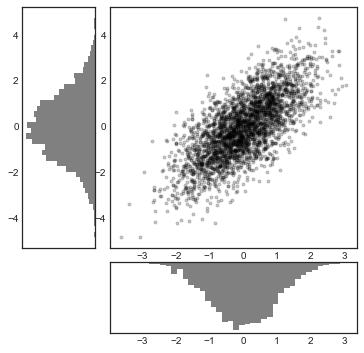

In [16]:
# great usage, so it could be a great tool
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()